<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Let's start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>

In [8]:
!pip install wordcloud

In [9]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(20)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  We should be left with a dataset that only contains alpha characters (including spaces). And should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

In [10]:
# Let's ignore the Unnamed columns by dropping columns 2,3,4 :
df = df.drop(columns=df.columns[[2, 3, 4]])

# Create a new DataFrame named 'clean' :
clean = df

# Rename its columns :
clean = clean.rename(columns={"v1": "Category", "v2": "Message"})

# Clean the data to only contain alpha characters and spaces :
clean["Message"] = ["".join([char for char in mail.lower() if char.isalpha() or char == " "]) for mail in clean["Message"]]

# Let's preview the result :
clean

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>
<p>We split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

In [11]:
# Split the data into two parts: a set for training the model, and a set for testing the model :
train_data = clean[:int(len(clean)*0.75):]
test_data = clean[int(len(clean)*0.75):]

# Verifying that train_data has length 4179 (75%) :
print(f"Size of train_data: {len(train_data)} ({len(train_data)*100/len(clean)}%)")
# Verifying that test_data has length 1393 (25%) :
print(f"Size of test_data: {len(test_data)} ({len(test_data)*100/len(clean)}%)")

# Verifying the length of the full data to make comparison :
print(f"Size of full data: {len(clean)}")


Size of train_data: 4179 (75.0%)
Size of test_data: 1393 (25.0%)
Size of full data: 5572


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  We should use the train_data not the test_data.</p>

In [12]:
# Create a dictionnary which will have words as keys, and [spam, ham] (number of occurences) as values :
word_occurences = {}

# Populate our dictionnary with the words from the mails of our train_data :
for mail in train_data.iterrows():
  isSpam = mail[1]["Category"] == "spam"
  message = mail[1]["Message"]

  for word in message.split():
    if word in word_occurences:
      if isSpam: word_occurences[word][0] += 1
      else: word_occurences[word][1] += 1
    else:
      if isSpam: word_occurences[word] = [1, 0]
      else: word_occurences[word] = [0, 1]

# Transform our dictionnary to a List :
word_occurences = [[word]+word_occurences[word] for word in word_occurences]

# Create a new DataFrame word_freq, and populate it with the data from word_occurences List :
word_freq = pd.DataFrame(word_occurences, columns = ["Word", "#Spam", "#Ham"])

# Let's preview the result :
word_freq

,Word,#Spam,#Ham
0,go,24,184
1,until,5,19
2,jurong,0,1
3,point,0,11
4,crazy,3,8
...,...,...,...
7362,teeth,0,1
7363,hidden,0,1
7364,royal,0,1
7365,tog,0,1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>



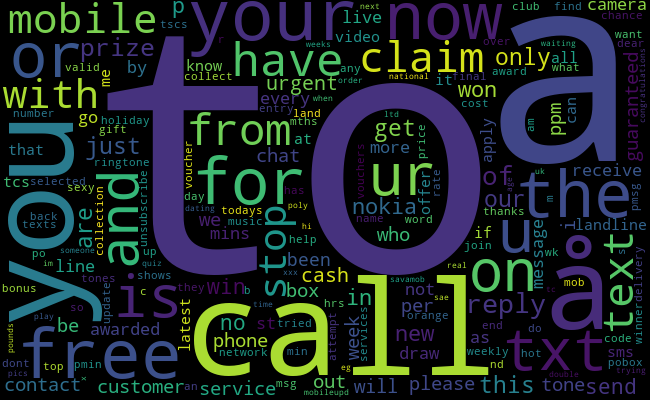

In [13]:
import wordcloud

# Create a dictionnary of words contained in spam messages with their occurences :
spams_word_freq = dict((word_freq.loc[i, "Word"], word_freq.loc[i , "#Spam"]) for i in word_freq.index)

# Create a visualisation of the most common words contained in spam messages :
wordcloud.WordCloud(width=650, height=400).fit_words(spams_word_freq).to_image()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next we create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam we divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message we divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, we will use a pseudocount k and estimate the probability of seeing the word as smoothing.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>


In [14]:
# Create a List that will contain the probability of occurences of each word as Spam and Ham :
probabilities = []

# Assign the value 0.5 to variable k for smoothing :
k = 0.5

# Calculate the total number of spam messages :
number_spam_messages = len([mail for mail in train_data.iterrows() if mail[1]["Category"] == "spam"])
# Calculate the total number of ham messages :
number_ham_messages = len([mail for mail in train_data.iterrows() if mail[1]["Category"] == "ham"])

# Populate the probabilities List :
for occurence in word_freq.iterrows():
  probabilities.append([occurence[1]["Word"], (occurence[1]["#Spam"] + k) / (number_spam_messages + 2 * k), (occurence[1]["#Ham"] + k) / (number_ham_messages + 2 * k)])

# Create a new DataFrame populated with the values from the probabilities List :
word_prob = pd.DataFrame(probabilities, columns = ["Word", "P(E|S)", "P(E|¬S)"])

# Let's preview the result :
word_prob

,Word,P(E|S),P(E|¬S)
0,go,0.043286,0.051037
1,until,0.009717,0.005394
2,jurong,0.000883,0.000415
3,point,0.000883,0.003181
4,crazy,0.006184,0.002351
...,...,...,...
7362,teeth,0.000883,0.000415
7363,hidden,0.000883,0.000415
7364,royal,0.000883,0.000415
7365,tog,0.000883,0.000415


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>

In [15]:
# Calculate the prior values using the proportions from our data sets :
prior_spam = (number_spam_messages + k) / (len(train_data) + 2 * k)
prior_ham = (number_ham_messages + k) / (len(train_data) + 2 * k)

# Pick a single word from our data :
word = "free"

# Calculate 𝑃(𝐸|𝑆)𝑃(𝑆)+𝑃(𝐸|¬𝑆)𝑃(¬𝑆) (total probability)
total_probability = (word_prob[word_prob["Word"] == word]["P(E|S)"] * prior_spam) + (word_prob[word_prob["Word"] == word]["P(E|¬S)"] * prior_ham)

# Calculate P(S|E) :
spamliness = (word_prob[word_prob["Word"] == word]["P(E|S)"] * prior_spam) / total_probability

# Calculate P(¬S|E) :
hamliness = (word_prob[word_prob["Word"] == word]["P(E|¬S)"] * prior_ham) / total_probability

# Now let's see the result :
print("Output")
print(f"Word = ['{word}']")
print(f"P(E|S) = [{float(word_prob[word_prob['Word'] == word]['P(E|S)'])}]")
print(f"P(E|¬S) = [{float(word_prob[word_prob['Word'] == word]['P(E|¬S)'])}]")
print(f"P(S|E) = [{float(spamliness)}]")
print(f"P(¬S|E) = [{float(hamliness)}]")


Output
Word = ['free']
P(E|S) = [0.299469964664311]
P(E|¬S) = [0.012033195020746889]
P(S|E) = [0.7956534709050165]
P(¬S|E) = [0.2043465290949836]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

We calculate the probability for each word in a message being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then we assume the message as spam.
</p>
<p>If we have a word in your message that is not in the word_prob DataFrame then we can't get the probability. Therefore, we will skip any words in the message that are not in the word_prob DataFrame.</p>

In [16]:
# Create probabilities lists :
prob_spam = float(prior_spam)
prob_ham = float(prior_ham)

# Pick a message from our data :
message = "call me as soon as you get home bro"

# Calculate the probabilities for each word of the message :
for word in message.split():
  if word in [occurence for occurence in word_prob["Word"]]:
    # Calculate 𝑃(𝑥𝑖|𝑆) :
    spamliness = (word_prob[word_prob["Word"] == word]["P(E|S)"])

    # Calculate 𝑃(𝑥𝑖|¬𝑆) :
    hamliness = (word_prob[word_prob["Word"] == word]["P(E|¬S)"])

    # Calculate the product 𝑃(𝑆)∏𝑛𝑖=1𝑃(𝑥𝑖|𝑆) :
    prob_spam*=float(spamliness)
    # Calculate the product 𝑃(¬𝑆)∏𝑛𝑖=1𝑃(𝑥𝑖|¬𝑆) :
    prob_ham*=float(hamliness)


# Calculate 𝑃(𝑆)∏𝑛𝑖=1𝑃(𝑥𝑖|𝑆)+𝑃(¬𝑆)∏𝑛𝑖=1𝑃(𝑥𝑖|¬𝑆) :
total_probability = prob_spam + prob_ham

# Calculate 𝑃(𝑆|𝑥1,…,𝑥𝑛) :
prob_spam /= total_probability
# Calculate 𝑃(¬𝑆|𝑥1,…,𝑥𝑛)
prob_ham /= total_probability

# Now let's see the result :
print(f"prob_spam: {prob_spam}")
print(f"prob_ham: {prob_ham}")
if prob_spam > prob_ham:
  print("This message is a spam!")
else:
  print("This message is not a spam.")



prob_spam: 0.06017184947133063
prob_ham: 0.9398281505286693
This message is not a spam.


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>

In [17]:
from math import log2

# Create probabilities lists :
prob_spam = log2(float(prior_spam))
prob_ham = log2(float(prior_ham))

# Pick a message from our data :
message = "call me as soon as you get home bro"

# Calculate the probabilities for each word of the message :
for word in message.split():
  if word in [occurence for occurence in word_prob["Word"]]:
    # Calculate 𝑃(𝑥𝑖|𝑆) :
    spamliness = (word_prob[word_prob["Word"] == word]["P(E|S)"])

    # Calculate 𝑃(𝑥𝑖|¬𝑆) :
    hamliness = (word_prob[word_prob["Word"] == word]["P(E|¬S)"])

    # Calculate the sum log(P(S)) + log(P(x1|S))+⋅⋅⋅+log(P(xn|S))  :
    prob_spam+=log2(float(spamliness))
    # Calculate the sum log(P(¬S)) + log(P(x1|¬S))+⋅⋅⋅+log(P(xn|¬S)) :
    prob_ham+=log2(float(hamliness))

# Now let's see the result :
print(f"prob_spam: {prob_spam}")
print(f"prob_ham: {prob_ham}")
if prob_spam > prob_ham:
  print("This message is a spam!")
else:
  print("This message is not a spam.")



prob_spam: -47.78800655196681
prob_ham: -43.822770176697716
This message is not a spam.


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  We should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>


In [18]:
from math import log2

def check_message(message):
  ''' Returns 'spam' or 'ham' depending on highest probability for a message '''
  # Create probabilities lists :
  prob_spam = log2(float(prior_spam))
  prob_ham = log2(float(prior_ham))

  # Calculate the probabilities for each word of the message :
  for word in message.split():
    if word in [occurence for occurence in word_prob["Word"]]:
      # Calculate 𝑃(𝑥𝑖|𝑆) :
      spamliness = (word_prob[word_prob["Word"] == word]["P(E|S)"])

      # Calculate 𝑃(𝑥𝑖|¬𝑆) :
      hamliness = (word_prob[word_prob["Word"] == word]["P(E|¬S)"])

      # Calculate the sum log(P(S)) + log(P(x1|S))+⋅⋅⋅+log(P(xn|S))  :
      prob_spam+=log2(float(spamliness))
      # Calculate the sum log(P(¬S)) + log(P(x1|¬S))+⋅⋅⋅+log(P(xn|¬S)) :
      prob_ham+=log2(float(hamliness))

  # Compare spam and ham probability to guess category :
  if prob_spam > prob_ham:
    return "spam"
  else:
    return "ham"


# Create counters :
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

# For each mail of our test_data :
for mail in test_data.iterrows():
  message = mail[1][1]
  category = mail[1][0]
  if check_message(message) == "spam":
    if category == "spam":
      match_spam += 1
    else:
      thought_ham_is_spam += 1
  else:
    if category == "ham":
      match_ham += 1
    else:
      thought_spam_is_ham += 1

# Now let's see the result :
print(f"match_spam {match_spam}")
print(f"match_ham {match_ham}")
print(f"thought_ham_is_spam {thought_ham_is_spam}")
print(f"thought_spam_is_ham {thought_spam_is_ham}")
print(f"Accuracy: {(match_spam + match_ham) / len(test_data.index)}")

match_spam 181
match_ham 1116
thought_ham_is_spam 95
thought_spam_is_ham 1
Accuracy: 0.9310839913854989


<h3>11. Improvements</h3>



*   As stated in the *Introduction*, we could consider things such as **telephone numbers, email adress, website link...** to identify spam;
*   We could decide on **more precise and accurate prior values**;
*   Use a **bigger test_data** set in order to have more accurate probabilities parameters;
*   Consider **ponctuation** as a parameter.



<h3></h3>